# TP 2.0 - Minor Assignments 10 & 11

In [1]:
%matplotlib notebook

<div class="alert alert-danger">
  <b>Minor Assignment 10/13:</b> <br/>  
Using the iris dataset used above, compare the clusters obtained using another clustering approach.
</div>

<IPython.core.display.Javascript object>


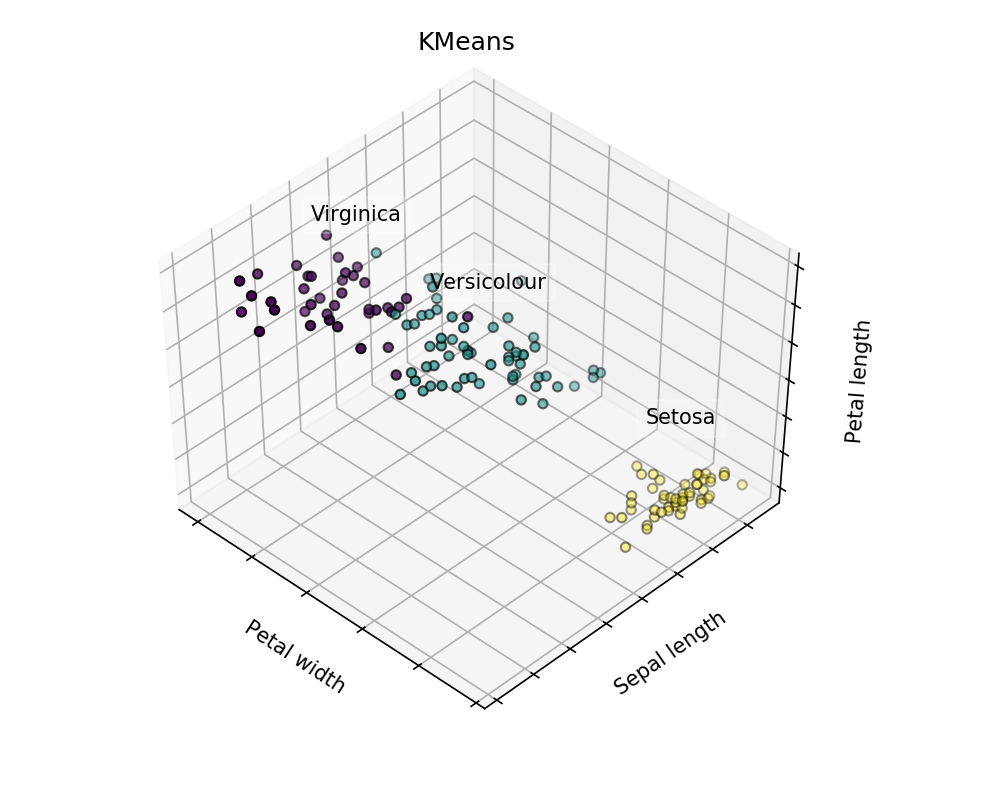

<IPython.core.display.Javascript object>


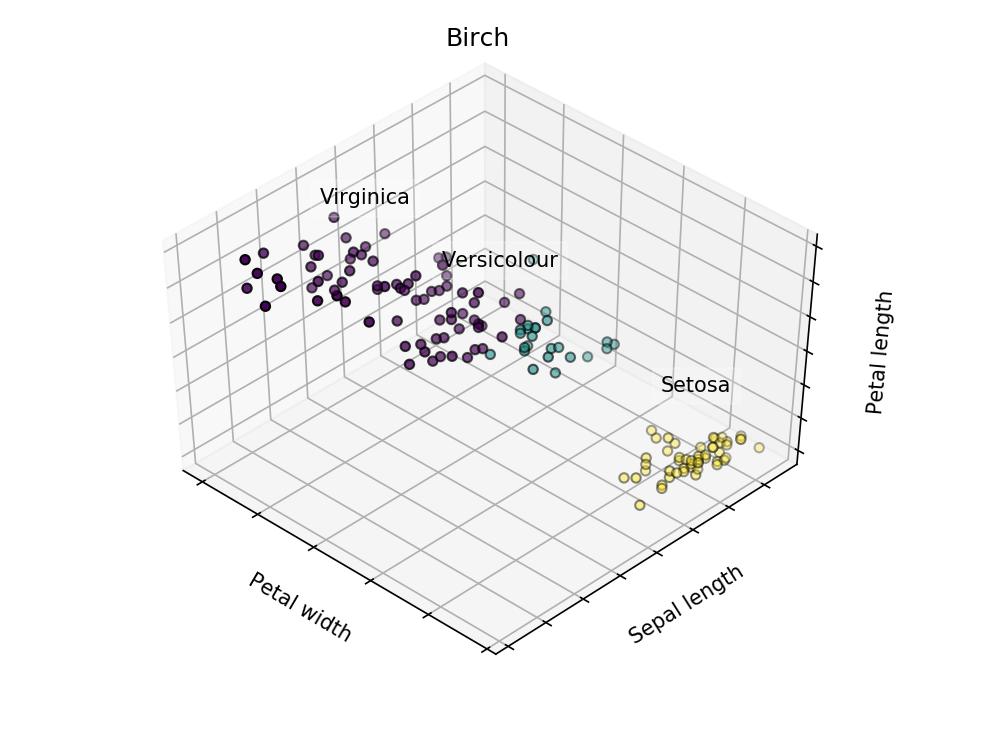

In [2]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 10

# import des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets, cluster
from sklearn.manifold import TSNE
from itertools import cycle, islice

# import des données
iris = datasets.load_iris()

# on sépare les valeurs des features et celles des labels
X = iris.data
y = iris.target

est = KMeans(n_clusters=3)
fig = plt.figure(1, figsize=(4, 3))  # on initialise la première figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

est.fit(X)  # on entraine notre label
labels = est.labels_

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2, name,
              horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# on réordonne les labels pour avoir les couleurs qui correspondent avec celles des résultats du cluster
y = np.choose(labels, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.title('KMeans')
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.dist = 12

y = iris.target  # on réinitialise y
birch = cluster.Birch(n_clusters=3)
fig = plt.figure(2, figsize=(4, 3))  # on initialise la seconde figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

birch.fit(X)  # on entraine notre label
labels = birch.labels_

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2, name,
              horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
    
# on réordonne les labels pour avoir les couleurs qui correspondent avec celles des résultats du cluster
y = np.choose(labels, [0, 1, 2]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')
plt.title('Birch')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.dist = 12
plt.show()


On remarque que le nombre d'éléments dans le cluster Versicolour est plus faible pour la méthode Birch que pour la méthode KMeans. Le cluster Setosa est identique.

<div class="alert alert-danger">
  <b>Minor Assignment 11/13:</b> <br/>  
Apply a clustering approach on the dataset used in the major assignment. Graphically represent the results and discuss them.
</div>

<IPython.core.display.Javascript object>


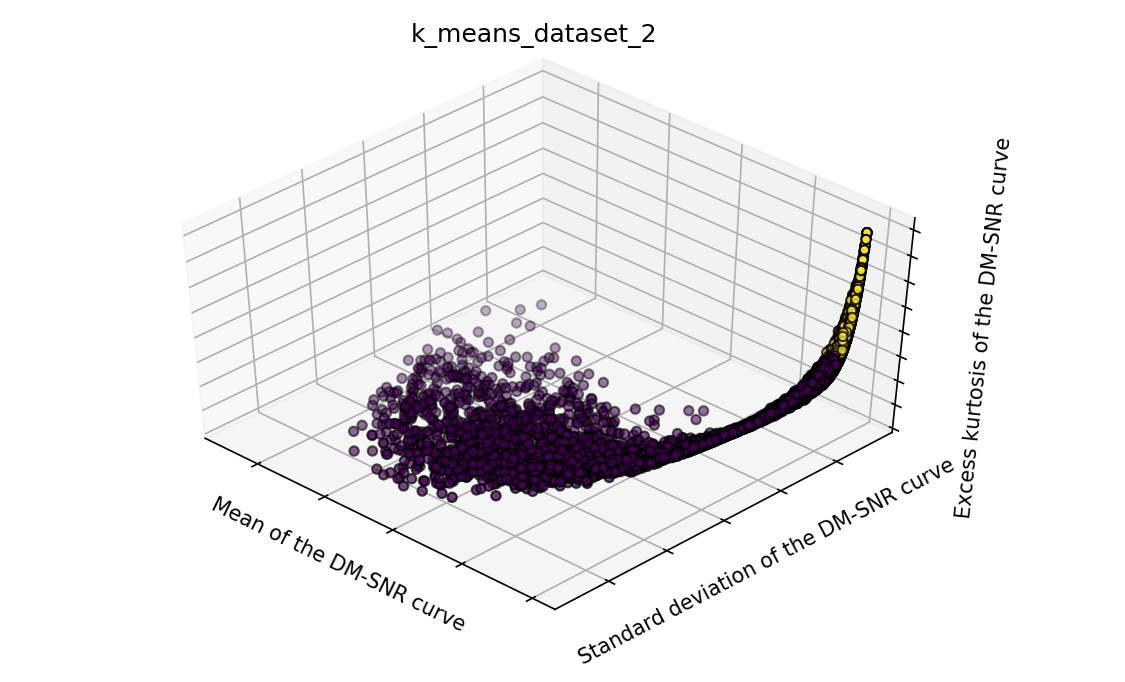

<IPython.core.display.Javascript object>


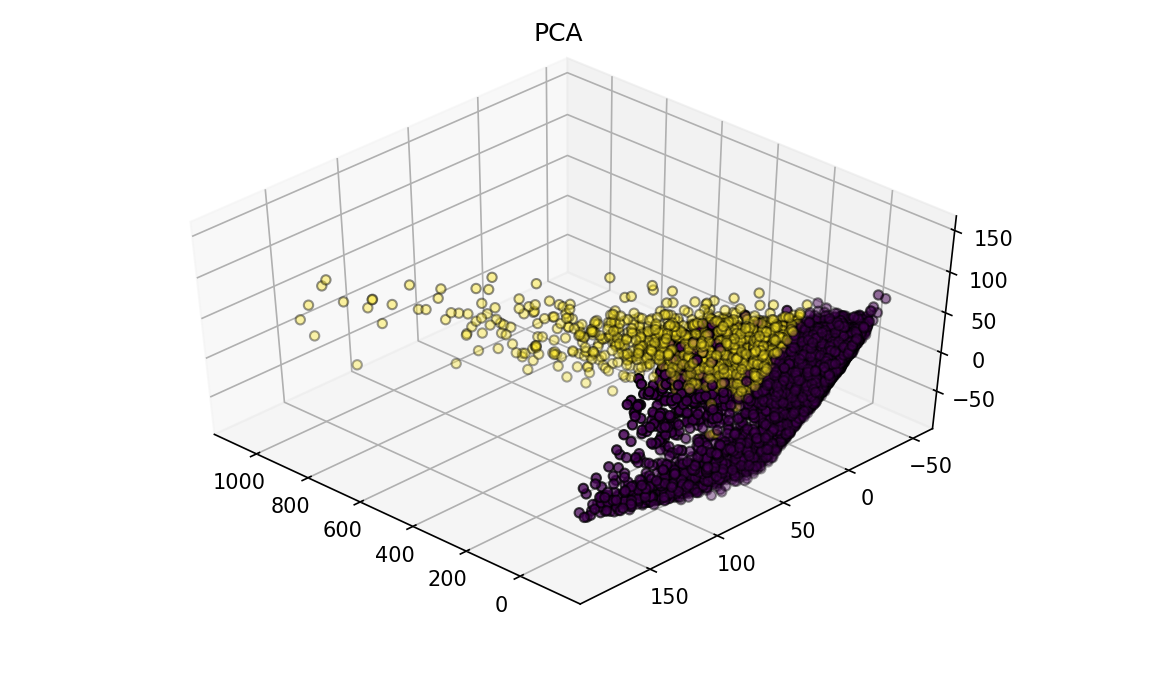

<IPython.core.display.Javascript object>


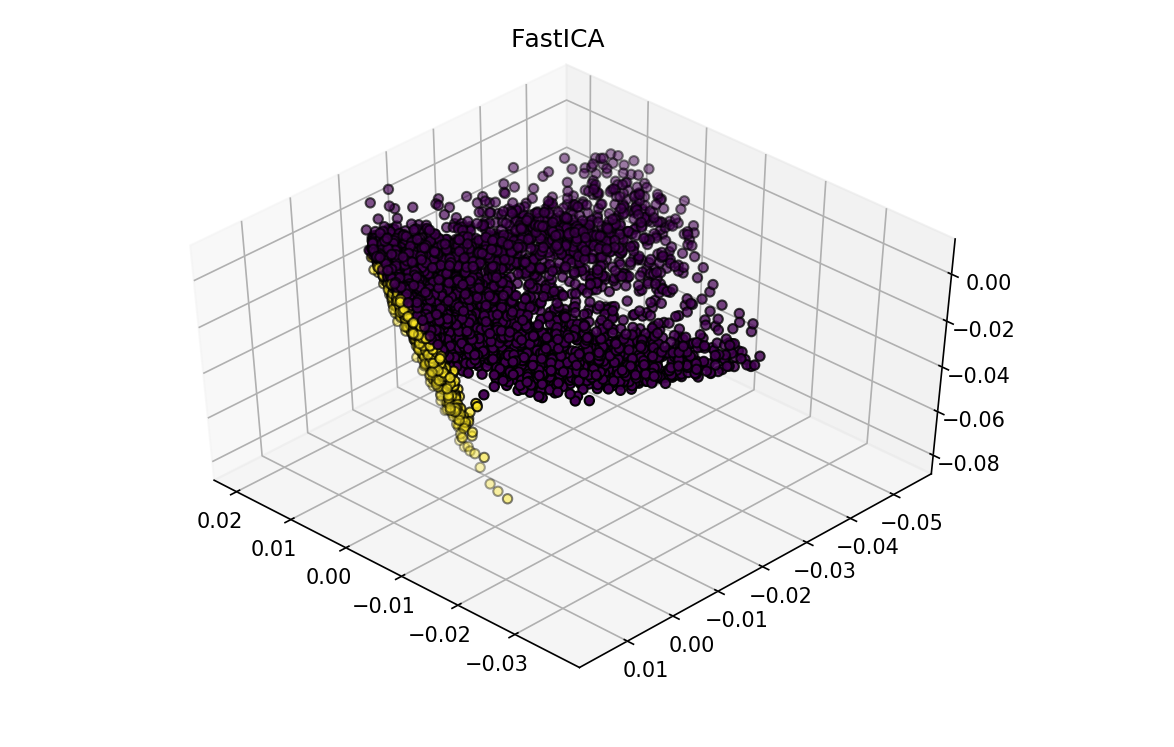

In [3]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 11

# import des bibliothèques
import pandas
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA

# import des données
data = open("HTRU_2.csv", "r")
data_list = list(csv.reader(data))

# on stocke les données sous forme de liste de listes
data_list = list(np.float_(data_list))

# on fait une liste des valeurs de chaque caractéristique
X0 = []  # Mean of the integrated profile
X1 = []  # Standard deviation of the integrated profile
X2 = []  # Excess kurtosis of the integrated profile
X3 = []  # Skewness of the integrated profile
X4 = []  # Mean of the DM-SNR curve
X5 = []  # Standard deviation of the DM-SNR curve
X6 = []  # Excess kurtosis of the DM-SNR curve
X7 = []  # Skewness of the DM-SNR curve
# liste des Xi, pratique pour pouvoir tracer plusieurs graphiques en fonction de différents triplets de caractéristiques
X = []  # liste des listes Xi
labels = []
data = []

# on remplit nos listes de chaque caractéristique
for i in range(0, 17898):
    labels.append(data_list[i][8])
    X0.append(data_list[i][0])
    X1.append(data_list[i][1])
    X2.append(data_list[i][2])
    X3.append(data_list[i][3])
    X4.append(data_list[i][4])
    X5.append(data_list[i][5])
    X6.append(data_list[i][6])
    X7.append(data_list[i][7])
    data.append(data_list[i][0:8])

X.append(X0)
X.append(X1)
X.append(X2)
X.append(X3)
X.append(X4)
X.append(X5)
X.append(X6)
X.append(X7)

estimators = [('k_means_2', KMeans(n_clusters=2))]
est = estimators[0][1]
# permet de trouver un graphique explicite (dépend des dimensions sélectionnées en tant qu'axe 
# (on fait avec X0, X1 et X2; puis avec X1, X2 et X3 etc.). On ne fait pas toutes les possibilités

# for i in range(6):
#     fig = plt.figure(i, figsize=(4, 3))
#     ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#     est.fit(data_list)
#     labels = est.labels_
#     y = np.choose(labels, [0, 1]).astype(np.float)
## on voit ici l'utilité de X
#     ax.scatter(X[i], X[i+1], X[i+2], c=y, edgecolor='k')
#     ax.w_xaxis.set_ticklabels([])
#     ax.w_yaxis.set_ticklabels([])
#     ax.w_zaxis.set_ticklabels([])
#     ax.dist = 12
# plt.show()

# la figure 4 est la plus intéressante, nous allons l'isoler et la tracer

fig = plt.figure(1, figsize=(4, 3))  # initialisation de la première figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

est.fit(data_list)  # on entraine notre modèle
labels = est.labels_

y = np.choose(labels, [0, 1]).astype(np.float)
ax.scatter(X4, X5, X6, c=y, edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Mean of the DM-SNR curve')
ax.set_ylabel('Standard deviation of the DM-SNR curve')
ax.set_zlabel('Excess kurtosis of the DM-SNR curve')
ax.set_title('k_means_dataset_2')
ax.dist = 12

# on peut aussi faire en utilisant les méthodes de réduction de dimensionnalité
# les méthodes de réduction de dimensionnalité non linéaires telles que TSNE et MDS ne sont pas traitées ici,
# car leurs temps de calcul est très important.

# réduction dimensionnalité PCA : rapide car linéaire
fig = plt.figure(2, figsize=(4, 3))  # initialisation de la seconde figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
X_pca = PCA(n_components=3).fit_transform(data)
y = np.choose(labels, [0, 1]).astype(np.float)
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, edgecolor='k')
ax.set_title('PCA')
ax.dist = 12

# réduction dimensionnalité FastICA : rapide car linéaire
fig = plt.figure(3, figsize=(4, 3))  # initialisation de la troisième figure
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
X_ica = FastICA(n_components=3).fit_transform(data)
y = np.choose(labels, [0, 1]).astype(np.float)
ax.scatter(X_ica[:, 0], X_ica[:, 1], X_ica[:, 2], c=y, edgecolor='k')
ax.set_title('FastICA')
ax.dist = 12
plt.show()


Pour mieux identifier les 2 clusters, il est intéressant d'appliquer des méthodes de réduction de dimensionnalité comme PCA ou ICA car même en sélectionnant 3 des 8 features et en les utilisant comme axes, les clusters ne sont pas disjoints.